In [10]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

df = pd.read_csv('train.csv')

In [11]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
len(df)

31962

In [14]:
df['label'] = df['label'].replace([0],'Not Offensive')
df['label'] = df['label'].replace([1],'Offensive')

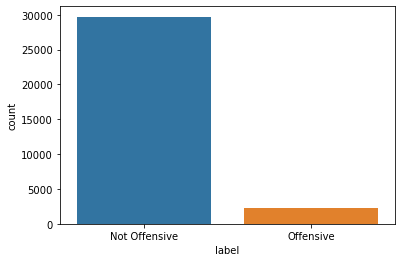

In [15]:
sns.countplot(x='label', data=df, dodge=False)
plt.show()

In [16]:
df['label'] = df['label'].replace(['Not Offensive'], 0)
df['label'] = df['label'].replace(['Offensive'], 1)

In [6]:
df.label.value_counts()/len(df)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [7]:
len_reviews = df.tweet.str.len()
max(len_reviews)

274

In [8]:
df.loc[df.tweet.str.len()== 274]

,id,label,tweet
19770,19771,0,@user lmfao pathetic #soit #growup #funny #...


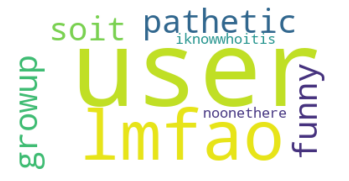

In [9]:
from wordcloud import WordCloud
sentiment = WordCloud(background_color="white").generate(df.tweet[19770])
plt.imshow(sentiment, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
df.tweet[19770]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)
vect.fit(df.tweet)
X = vect.transform(df.tweet)
X_df= pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [12]:
pd.set_option('display.max_columns', None)
X_df.head()

,00,06,10,100,11,12,13,15,16,1st,20,2016,2017,24,2nd,30,3d,50,able,about,account,act,actor,actually,adapt,adventure,affirmation,affirmations,after,afternoon,again,against,ago,agree,ahead,all,allahsoil,almost,alone,along,already,also,altwaystoheal,always,am,amazing,america,american,americans,amp,an,and,angry,animals,anniversary,another,anxiety,any,anymore,anyone,anything,app,apple,are,aren,around,arrived,as,ask,ass,at,attack,available,away,awesome,aww,babies,baby,back,bad,bday,be,beach,bear,beautiful,beauty,because,become,bed,been,beer,before,behind,being,believe,best,better,big,bihday,bing,birds,bit,black,bless,blessed,blog,blonde,blue,blur,body,bong,book,booked,both,bought,boy,boyfriend,boys,break,breakfast,brexit,bring,broken,brother,buffalo,bull,business,busy,but,buy,by,cake,call,called,came,can,cannot,cant,cantwait,car,care,cat,cats,cause,celebrate,change,chase,check,child,children,chill,choose,city,class,climb,close,club,coffee,cold,college,color,come,comes,coming,comments,community,complete,conce,conference,congrats,control,cool,could,couldn,countdown,country,couple,course,crazy,cry,crying,culture,customer,cute,dad,daddy,dads,daily,damn,dance,dark,date,daughter,day,days,dead,dear,death,delete,deletetweets,depressed,depression,design,despite,development,did,didn,die,different,dinner,direct,disappointed,disney,dj,do,does,doesn,dog,dogs,doing,dominate,don,done,dont,down,dream,dreams,drink,drinks,due,during,each,early,easy,eat,education,else,empty,end,england,enjoy,enjoying,enough,environment,episode,euro2016,even,evening,event,ever,every,everyday,everyone,everything,excited,exciting,expanse,experience,eyes,face,facebook,fact,fall,families,family,fan,fans,fantastic,far,fashion,father,fathers,fathersday,favorite,fear,feel,feeling,feelings,feels,festival,few,film,final,finally,find,finding,finished,first,fitness,flag,florida,flowers,follow,followers,followme,followâ,food,football,for,forever,forex,forget,forward,found,france,free,freedom,fresh,friday,fridayfeeling,friend,friends,friendship,from,fuck,fucking,full,fun,funny,future,game,games,garden,gave,gay,gbp,get,gets,getting,gift,girl,girls,give,giving,glad,go,goals,god,goes,going,gold,gone,gonna,good,goodmorning,gop,gorgeous,gorilla,got,gotta,grateful,great,green,group,gt,guess,gun,guns,guy,guys,gym,had,haha,hair,half,happen,happened,happening,happier,happiness,happy,hard,hardcore,has,hate,hatred,have,haven,having,he,hea,heabroken,head,heal,healing,health,healthy,hear,heard,hell,hello,help,her,here,hey,hi,high,hill,hillary,him,his,history,hit,holiday,home,homes,hope,horny,hot,hour,hours,house,how,httâ,htâ,hu,human,hungry,husband,hâ,i_am,if,im,impoant,in,india,inshot,inspiration,instagood,instagram,instalike,instead,internet,into,is,islam,isn,it,its,japan,job,join,joy,july,june,just,keep,kid,kids,kill,killed,kind,kinky,know,la,lady,last,late,later,latest,laugh,lawofattraction,leadership,leads,learn,least,leave,leaving,left,less,let,lgbt,liberal,libtard,life,lifestyle,light,lighttherapy,like,like4like,line,list,listen,little,live,lives,living,ll,local,lol,london,lonely,long,look,looking,looks,lose,loss,lost,lot,lots,love,loved,lovely,lover,loves,loveâ,loving,lt,luck,lucky,lunch,mad,made,make,makes,makeup,making,man,many,mass,matter,may,maybe,me,mean,means,media,meet,meeting,memories,men,might,mind,mindset,mine,minutes,miss,missing,model,mom,moment,moments,monday,money,month,months,mood,more,morning,most,mother,motivation,mountains,move,movie,moving,much,music,muslim,must,my,myself,na,name,nasty,national,nature,naughty,nbafinals,need,needed,needs,nervous,never,new,news,next,nice,night,no,not,nothing,now,nude,nyc,obama,of,off,office,officially,oh,oitnb,ok,old,omg,on,once,one,ones,online,only,open,or,order,organizations,orlando,orlandoshooting,other,others,our,out,over,own,pa,pain,parents,park,past,pathetic,pay,peace,people,perfect,person,phone,photo,photography,photooftheday,photos,pic,picoftheday,picture,pink,pizza,place,places,play,playing,please,poetry,point,polar,police,poli

In [13]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(tweet) for tweet in df.tweet]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rsaha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original tokens:  ['@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#', 'run']
Cleaned tokens:  ['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']


In [14]:
len_tokens= []
for i in range(len(cleaned_tokens)):
    len_tokens.append(len(cleaned_tokens[i]))

df['len_tweet'] = len_tokens

In [15]:
df.head()

,id,label,tweet,len_tweet
0,1,0,@user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,19
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,11
4,5,0,factsguide: society now #motivation,4


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

my_stop_words= ENGLISH_STOP_WORDS.union(['ªð', 'ºï', 'ºð', '¼ð', '½ð', '¾ð', 'ó¾', 'ó¾', 'ó¾', '¹ð'])
vect_Tf = TfidfVectorizer(max_features= 200, ngram_range = (1, 2), stop_words= my_stop_words, 
                          token_pattern=r'\b[^\d\W][^\d\W]+\b')
model = vect_Tf.fit(df.tweet)
X_Tf= model.transform(df.tweet)
X_Tf_df = pd.DataFrame(X_Tf.toarray(), columns= vect_Tf.get_feature_names())
X_Tf_df.head()

,affirmation,altwaystoheal,altwaystoheal healthy,amazing,america,amp,angry,attack,away,awesome,baby,bad,beach,bear,beautiful,believe,best,better,big,bihday,black,blessed,blog,blog silver,bull,bull direct,bull dominate,change,city,climb,come,coming,cool,cute,dad,day,days,did,direct,direct want,dog,dominate,dominate bull,don,end,enjoy,excited,family,father,father day,fathers,fathers day,fathersday,feel,feeling,finally,follow,food,forex,forward,free,friday,friend,friends,fun,funny,game,getting,girl,girls,god,going,gold,gold forex,good,got,grateful,great,gt,guys,happiness,happy,hate,having,hea,healing,healthy,help,holiday,home,hope,i_am,i_am positive,instagood,just,kids,know,left,let,life,like,little,live,ll,lol,long,look,looking,lost,love,love time,lt,make,makes,man,miss,model,model love,monday,morning,motivation,music,need,new,news,nice,night,oh,old,orlando,pay,peace,people,place,play,playing,polar,polar bear,positive,positive affirmation,proud,quote,ready,real,really,right,sad,saturday,say,school,selfie,silver,silver gold,smile,soon,sta,stop,summer,sun,sunday,team,thank,thankful,thankful positive,thanks,thing,things,think,time,time urð,today,tomorrow,tonight,travel,true,trump,urð,user,user just,user user,ve,video,wait,waiting,want,watch,watching,way,wedding,week,weekend,white,wish,women,won,work,world,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.618767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250627,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530779,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.610496,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.443922,0.0,0.385358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [17]:
X_Tf_df.shape

(31962, 200)

In [18]:
X_Tf_df['len_tweet'] = df['len_tweet']

In [19]:
y= df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [20]:
#Check accuracy of logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_Tf_df, y, test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
mod_predict= model.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.9325268536865158


In [21]:
#Build a random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth= 50)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.933
Random Forest: f1-score=0.916
Confusion matrix
[[8820   85]
 [ 560  124]]


### MODEL

In [22]:
#Hyperparameter tuning for LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.1, 1, 10, 100]}
logreg = LogisticRegression (max_iter=2000)
cv = GridSearchCV(logreg, param_grid = parameters, cv= 5)
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test)
score= accuracy_score(y_test, y_predict)
print(cv.best_params_, score)

{'C': 100} 0.932318281364063


### LogisticRegression gives accuracy 0.932 after hyper parameter tuning

In [23]:
#1 hidden layer model with 1000 nodes
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(42)



n_cols = X_Tf_df.shape[1]
#y_train = np.asarray(train_labels).reshape((-1,1))
#y_test = np.asarray(test_labels).reshape((-1,1))
model = Sequential()

model.add(Dense(201, activation='relu', input_shape = (n_cols,)))
model.add(Dense(201, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=10)
#model.fit(X_Tf_df, y)

Epoch 1/10
88/88 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.9206 - val_loss: 0.2020 - val_accuracy: 0.9304
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9331 - val_loss: 0.1960 - val_accuracy: 0.9327
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9350 - val_loss: 0.1885 - val_accuracy: 0.9319
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9363 - val_loss: 0.1886 - val_accuracy: 0.9316
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9356 - val_loss: 0.1908 - val_accuracy: 0.9320
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9365 - val_loss: 0.1880 - val_accuracy: 0.9322
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9363 - val_loss: 0.1923 - val_accuracy: 0.9328
Epoch 8/10
88/88 [==

Epoch 1/500
88/88 [==============================] - 1s 6ms/step - loss: 0.2642 - accuracy: 0.9202 - val_loss: 0.2050 - val_accuracy: 0.9308
Epoch 2/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9342 - val_loss: 0.1978 - val_accuracy: 0.9315
Epoch 3/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9352 - val_loss: 0.1886 - val_accuracy: 0.9323
Epoch 4/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.9355 - val_loss: 0.1922 - val_accuracy: 0.9326
Epoch 5/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1783 - accuracy: 0.9364 - val_loss: 0.1877 - val_accuracy: 0.9325
Epoch 6/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1768 - accuracy: 0.9367 - val_loss: 0.1895 - val_accuracy: 0.9328
Epoch 7/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9366 - val_loss: 0.1902 - val_accuracy: 0.9330
Epoch 8/500
8

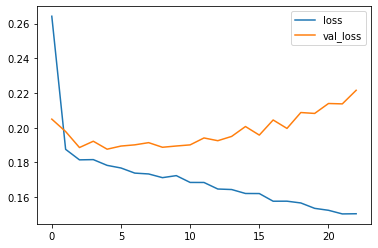

In [24]:
#Adding layers, dropout, early stopping and batchnormalization; removing batchnormalization increases test accuracy; 
#optimizers RMSprop and Adagrad were investigated as well. Layer and nodes were varied, epoch size was increased from 50 to 500
#and batch size was varied between 16 to 256.

import numpy as np
import keras
import tensorflow as tf

from keras.layers import Dense

from keras.models import Sequential

from keras.optimizers import RMSprop, Adagrad, SGD
import tensorflow
tensorflow.random.set_seed(42)

n_cols = X_Tf_df.shape[1]
#y_train = np.asarray(train_labels).reshape((-1,1))
#y_test = np.asarray(test_labels).reshape((-1,1))
model = Sequential()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

keras.layers.Dropout(0.9),
#keras.layers.BatchNormalization()
model.add(Dense(302, activation='relu', input_shape = (n_cols,)))
keras.layers.Dropout(0.5),
#keras.layers.BatchNormalization(),
model.add(Dense(302, activation='relu'))
#keras.layers.Dropout(0.5),
#keras.layers.BatchNormalization(),
#model.add(Dense(302, activation='relu'))
keras.layers.Dropout(0.5),
#keras.layers.BatchNormalization(),
model.add(Dense(302, activation='relu'))
keras.layers.Dropout(0.9),
#keras.layers.BatchNormalization(),
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks= [early_stopping], batch_size=256, epochs=500)
#model.fit(X_Tf_df, y)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

### The neural network accuracy is 0.9347 after hyperparameter tuning

In [25]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.264226,0.920172,0.204967,0.930754
1,0.187564,0.934206,0.197820,0.931484
2,0.181511,0.935234,0.188605,0.932318
3,0.181647,0.935503,0.192229,0.932631
4,0.178333,0.936352,0.187651,0.932527


In [26]:
#Training a support vector machine
from sklearn.svm import SVC
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
mod_predict= modelSVC.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.9286682657211388


In [27]:
#Hyperparameter training in SVC

param_grid = {'C': [0.01, 0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  18.7s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  16.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  16.4s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  13.8s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  14.5s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   9.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   9.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   9.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   9.5s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   9.4s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   8.5s
[CV] END .....................C=0.01, gamma=0.0

In [37]:
from sklearn import metrics
modelSVC = SVC(probability = True, C= 10, gamma= 0.1)
modelSVC.fit(X_train, y_train)
mod_predict= modelSVC.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.932318281364063


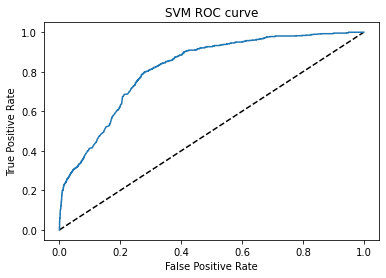

In [38]:
#ROC curve for SVM
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
y_pred_prob = modelSVC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

In [39]:
#check AUC for logistic Regression
roc_auc_score(y_test, y_pred_prob)

0.8184079185423787

In [40]:
print(classification_report(y_test, mod_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8905
           1       0.63      0.13      0.21       684

    accuracy                           0.93      9589
   macro avg       0.78      0.56      0.59      9589
weighted avg       0.91      0.93      0.91      9589

